# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
np.set_printoptions(suppress=True)

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
print(f"Filas: {len(boston['data'])}")
print(f"Columnas: {len(boston['data'][0])}")
print(f"Targets: {len(boston['target'])}")
print(boston['feature_names'])

Filas: 506
Columnas: 13
Targets: 506
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston['DESCR'])   # descripción del dataset
boston['data']           # matriz con los datos de entrada (atributos)
boston['target']         # vector de valores a predecir MEDV
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
print(f"Tamaño data:{boston['data'].shape}\nTamaño target:{boston['target'].shape}")

Tamaño data:(506, 13)
Tamaño target:(506,)


## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [7]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
print(f"-Tamaño X: {X.shape}\n-Tamaño y: {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
print(f"-Tamaño X train: {X_train.shape}\n-Tamaño y train: {y_train.shape}")
print(f"-Tamaño X test: {X_test.shape}\n-Tamaño y test: {y_test.shape}")

-Tamaño X: (506, 13)
-Tamaño y: (506,)
-Tamaño X train: (404, 13)
-Tamaño y train: (404,)
-Tamaño X test: (102, 13)
-Tamaño y test: (102,)


## Descripción de los Datos y la Tarea

**1. ¿De qué se trata el conjunto de datos?**  
- El conjunto de datos se trata de distintas metricas que se estima influyen en el valor de las propiedades en Boston.

**2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?**  
- La variable objetivo a predecir es `MEDV` que es la mediana del valor de las propiedades ocupadas en miles de dolares.

**3. ¿Qué información (atributos) hay disponibles para hacer la predicción?**  
- Atributos disponibles:    
  - `CRIM`     Tasa de criminalidad per cápita por ciudad    
  - `ZN`       Proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.    
  - `INDUS`    Proporcion de acres de negocios no minoristas por ciudad  
  - `CHAS`     Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)  
  - `NOX`      Concentracion de oxidos nitricos (partes por 10 millones)  
  - `RM`       Numero promedio de habitaciones por vivienda  
  - `AGE`      Proporción de unidades ocupadas por sus propietarios construidas antes de 1940  
  - `DIS`      Distancias ponderadas a los 5 centros de empleo de Boston  
  - `RAD`      Indice de accesibilidad carreteras radiales  
  - `TAX`      Tasa del valor total del impuesto a la propiedad por 10.000$  
  - `PTRATIO`  Proporcion de alumnos por maestro por ciudad  
  - `B`        Proporcion ponderada de personas negras por ciudad **WARNING!!!** Ok, demasiado racista  
  - `LSTAT`    Proporción de la población que tiene un estatus más bajo = 1/2 (proporción de adultos sin educación secundaria y proporción de trabajadores varones clasificados como peones). La especificación logarítmica implica que las distinciones de estatus socioeconómico significan más en los tramos superiores de la sociedad que en las clases inferiores. - *David Harrison Jr. and Daniel L. Rubinfeld, ‘Hedonic housing prices and the demand for clean air’, Journal of Environmental Economics and Management, Volume 5, Issue 1, March 1978, Pages 81-102.*

**4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?**

 - Consideramos que los atributos mas determinantes para la predicción son `RM` , `RAD`, `DIS`, `TAX`, `CHAS`. Luego pueden tener cierta influencia `CRIM`,  `AGE`, `PTRATIO`,`NOX`, `ZN`. Las demas no creemos que sean relevantes.  

**5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.**  
- El conjunto de datos considera variables que no guardan relación directa con lo que se quiere evaluar y esto puede sesgar el modelo fuertemente. Por ejemplo, conocer ***la proporción ponderada de personas negras por ciudad*** es algo que en efecto es racista y no tiene sentido pensar que afecta al valor de una propiedad, sin embargo si correlaciona un poco con una variable que es determinante puede sesgar fuertemente el modelo predictivo que se utilice. Esto claramente representa un riesgo y como aparece en el Warning que se genera cuando se carga el dataset, el mismo no deberia ser utilizado en la práctica para la aplicación real de un modelo.

## **Visualización de los Datos**


Relación de cada atributo con la variable objetivo



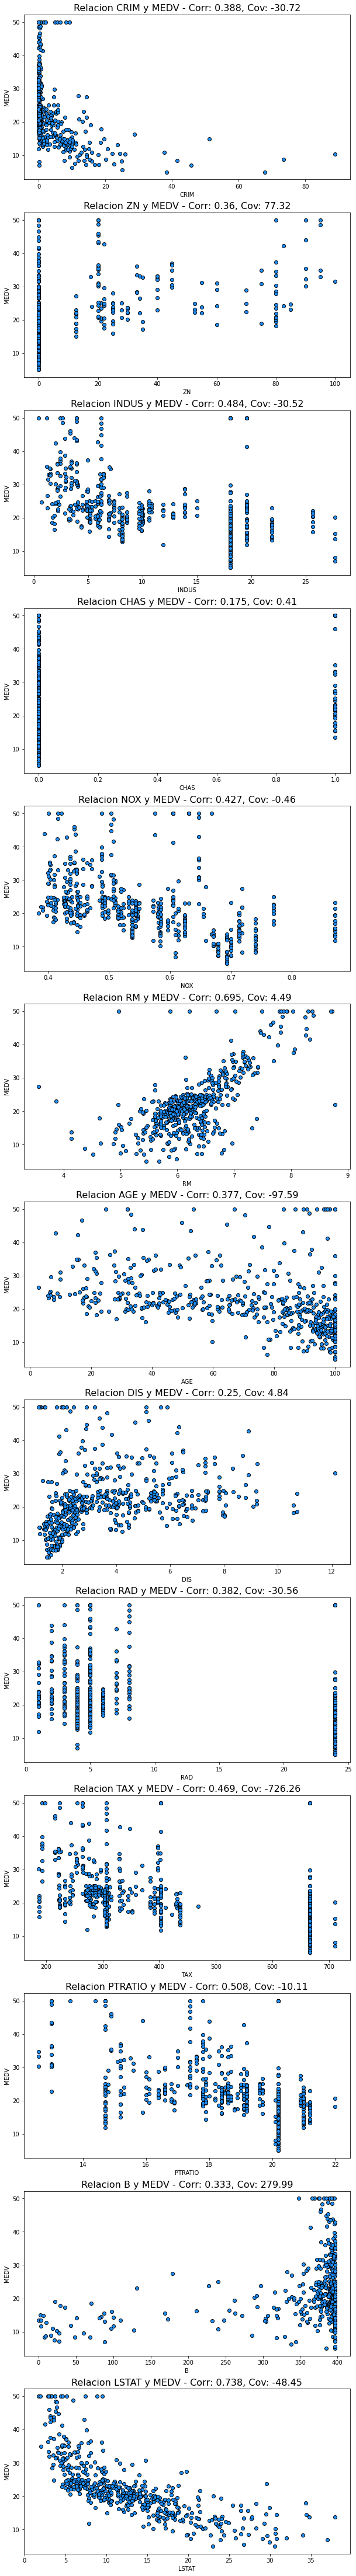

In [8]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

fig, axes = plt.subplots(nrows=13,figsize=(10,80))
lista = []
for i in range(len(features)):
    corr=abs(round(np.corrcoef(x=X[:,i], y=y)[0][1],3)) 
    cov =round(np.cov(X[:,i],y)[0][1],2)
    axes[i].scatter(X[:,i], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    axes[i].set_title(f'Relacion {features[i]} y MEDV - Corr: {corr}, Cov: {cov}', fontsize=16)
    axes[i].set_xlabel(f'{features[i]}')
    axes[i].set_ylabel('MEDV')
    lista.append(f"{features[i]} - Corr: {corr}, Cov: {cov}")

plt.show()

**A partir de los gráficos, podemos identificar los siguientes atributos que a nuestro criterio son los más informativos para la predicción.**


- El atributo `RM` es lo suficientemente informativo y hasta inclusive se podria inferir una alta correlacion y covarianza positiva con la variable objetivo, es decir a mayor numero de cuartos promedio mayor tiende a ser la mediana de los valores de propiedad.

- El atributo `LSTAT` tambien parece ser informativo, se puede inferir una  alta correlacion con covarianza negativa respecto a  `MEDV`.

- Los atributos `NOX` , `AGE`, `DIS`, `INDUS` y `CRIM` parecen contener cierta informacion relevante ya que correlacionan un poco con la variable.


**En orden de importancia junto con sus medidas de correlación, los atributos son los siguientes:**

**1.** **LSTAT** - Corr: 0.74, Cov: -48.45'  
**2.** **RM** - Corr: 0.7, Cov: 4.49'  
**3.** **PTRATIO** - Corr: 0.51, Cov: -10.11'  
**4.** **INDUS** - Corr: 0.48, Cov: -30.52'   
**5.** **TAX** - Corr: 0.47, Cov: -726.26'  
**6.** **NOX** - Corr: 0.43, Cov: -0.46'  
**7.** **CRIM** - Corr: 0.39, Cov: -30.72'


## **Regresión Lineal**

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

**Consideramos que la relación entre el atributo "RM" y "MEDV" es la más apropiada para realizar un modelo de regresión lineal.**

In [9]:
feature = 'RM'  # selecciono el atributo 'RM'
selector = int(np.where(boston['feature_names'] == "RM")[0])#la diferencia entre usar este selector es q lo tratan como arrays de una dimension
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
#Redimensionamos ambos vectores
X_train_f = X_train_f.reshape(-1,1)
X_test_f = X_test_f.reshape(-1,1)
y_train_f = y_train.reshape(-1,1)
print(f"-Tamaño X_f train: {X_train_f.shape}\n-Tamaño y_f train: {y_train_f.shape}")

-Tamaño X_f train: (404, 1)
-Tamaño y_f train: (404, 1)


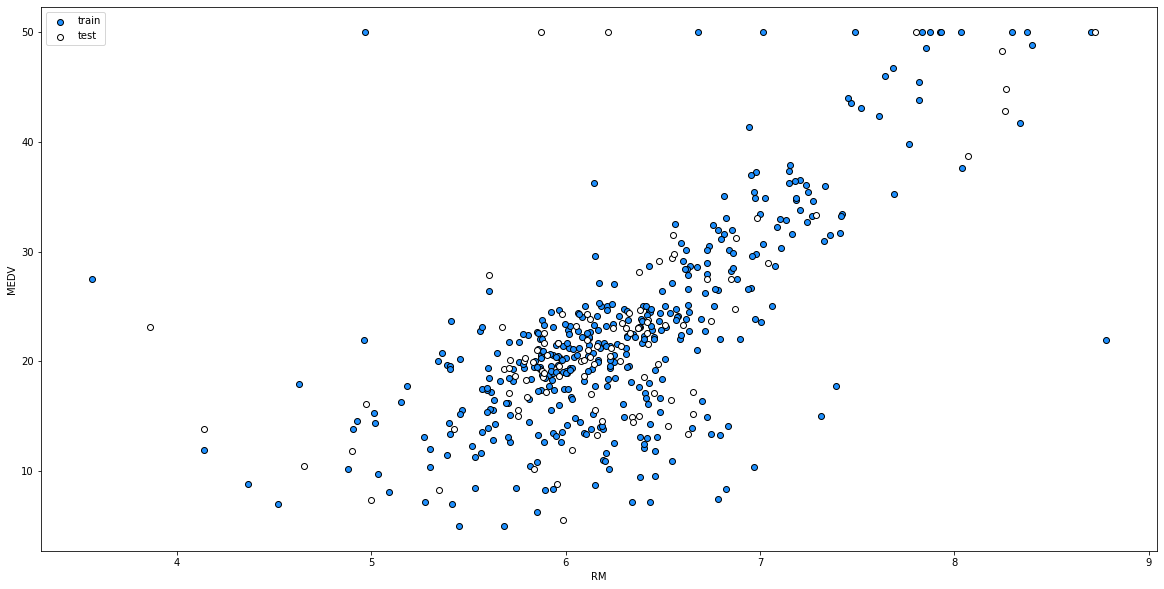

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(X_train_f, y_train_f, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test[:, selector], y_test, facecolor="white", edgecolor="k", label="test")
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()

**Regresión lineal de scikit-learn entrenandola a partir del atributo "RM"**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()  # que hacemos con el fit intercept?
lr.fit(X_train_f, y_train_f)
print(f"Coeficientes: {lr.coef_}")
print(f"Ordenada al origen: {lr.intercept_}")
print(f"Coeficiente de determinacion de la prediccion(Score): { round(lr.score(X_train_f, y_train_f),3)}")

Coeficientes: [[9.37638431]]
Ordenada al origen: [-36.47618963]
Coeficiente de determinacion de la prediccion(Score): 0.497


**Error cuadrático medio para los conjuntos de entrenamiento y evaluación.**

In [12]:
y_train_pred = lr.predict(X_train_f)
y_test_pred = lr.predict(X_test_f)
train_error = mean_squared_error(y_train_f, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.4}')
print(f'Test error: {test_error:0.4}')

Train error: 42.82
Test error: 46.91


**Gráfico del modelo resultante, junto con los puntos de entrenamiento y evaluación.**

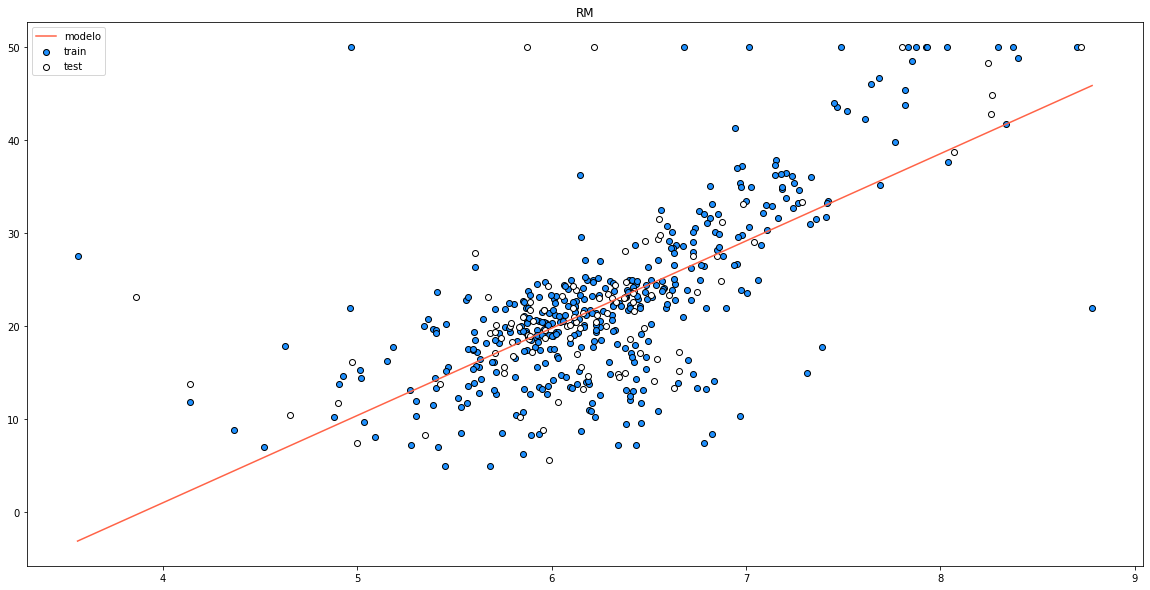

In [13]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(20,10))
plt.plot(x, lr.predict(x), color="tomato", label="modelo")
plt.scatter(X_train_f, y_train_f, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

PREGUNTAR SOBRE LA MAGNITUD DEL ERROR, ¿ES POR QUE EL MODELO AJUSTA MAL? ¿COMO LO INTERPRETAMOS?

**Interpretación del modelo**

El modelo de regresión lineal, al ser el más simple y debido a la dispersión de los datos, no alcanza a ajustarse tan precisamente y eso hace que el error de test sea bastante grande por lo que aceptamos que el modelo no es el más exacto a la hora de predecir los datos. 

Si tomásemos el modelo lineal, deberíamos aceptar que la mediana del valor de las propiedades ocupadas, podría diferir en casi USD 47 mil dolares dependiendo la cantidad de habitaciones que tenga.

## Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

### Para varios grados de polinomio:

1. Instanciamos y entrenamos una regresión polinomial.
2. Predecimos y calculamos error en entrenamiento y evaluación. Imprima los valores.
3. Guardamos los errores en una lista.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []
degrees = [0,1,2,3,4,5,6,7,8]
for degree in degrees:
    # 1. Instanciamos y entrenamos una regresión polinomial.
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train_f)
    
    #2. Predecimos y calculamos error en entrenamiento y evaluación.
    y_train_pred = model.predict(X_train_f)
    y_val_pred = model.predict(X_test_f)
    
    #3.Guardamos e imprimimos los errores en una lista.
    train_error = mean_squared_error(y_train_f, y_train_pred)
    test_error = mean_squared_error(y_test, y_val_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f"Polinomio grado {degree}\n- Train Error: {train_error:0.3}\n- Test error: {test_error:0.3}")

Polinomio grado 0
- Train Error: 85.1
- Test error: 81.6
Polinomio grado 1
- Train Error: 42.8
- Test error: 46.9
Polinomio grado 2
- Train Error: 37.7
- Test error: 39.8
Polinomio grado 3
- Train Error: 36.4
- Test error: 39.8
Polinomio grado 4
- Train Error: 34.8
- Test error: 41.6
Polinomio grado 5
- Train Error: 33.1
- Test error: 41.0
Polinomio grado 6
- Train Error: 33.1
- Test error: 41.0
Polinomio grado 7
- Train Error: 33.1
- Test error: 42.4
Polinomio grado 8
- Train Error: 33.1
- Test error: 42.4


###**Ejercicio 4.2:** Grafique las curvas de error en términos del grado del polinomio.

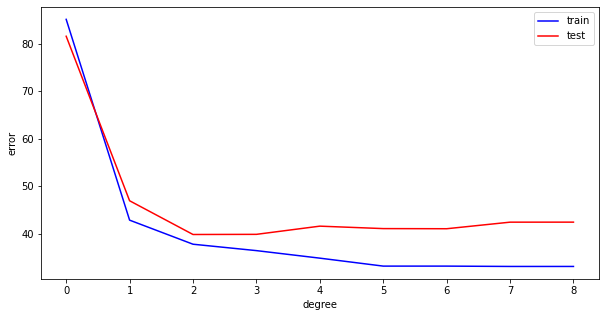

In [15]:
# 2. Graficar curvas de error acá.
plt.figure(figsize=(10,5))
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Se observa que en el polinomio de grado 2 es donde menor errror de Test hay, por lo que procedemos a elegir ese modelo.

###**Ejercicio 4.4:** Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.

De acuerdo al grafico se podria considerear el mejor modelo que ajusta los datos es el de grado 2, ya que baja el error y la diferencia entre las curvas es menor

In [16]:
# 1. Instancie y entrene una regresión polinomial.
pf_2 = PolynomialFeatures(2)
lr_2 = LinearRegression(fit_intercept=False)
model = make_pipeline(pf_2, lr_2)
model.fit(X_train_f, y_train_f)

#2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
y_train_pred_2 = model.predict(X_train_f)
y_val_pred_2 = model.predict(X_test_f)

#3.Guarde los errores en una lista.
train_error_2 = mean_squared_error(y_train_f, y_train_pred_2)
test_error_2 = mean_squared_error(y_test, y_val_pred_2)
print(f"Polinomio grado {2}\n- Train Error: {train_error_2:0.3}\n- Test_error: {test_error_2:0.3}")

Polinomio grado 2
- Train Error: 37.7
- Test_error: 39.8


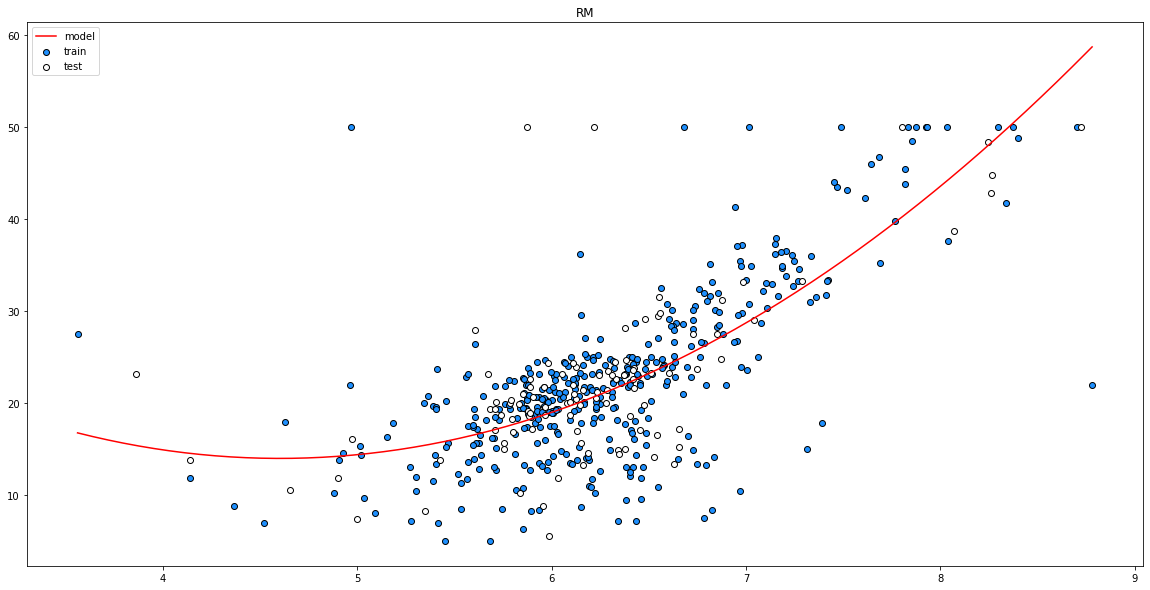

In [17]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(20,10))
plt.plot(x, model.predict(x), color="red", label="model")
plt.scatter(X_train_f, y_train_f, facecolor="dodgerblue", edgecolor="k", label="train")
#plt.scatter(X_train_f, y_train_pred_2, facecolor="green", edgecolor="k", label="predict")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

Se observa como el modelo ajusta mejor que el lineal, pero sigue sin ser perfecto.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

### Dos Atributos 

Se eligen en este caso el atributo 'RM' y el atributo 'LSTAT' ya que son los que presentaron mayor correlacion con la variable objetivo.

In [18]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM') #| (boston['feature_names'] == 'PTRATIO')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
y_final = y_train.reshape(-1,1)
y_train_fs = np.concatenate((y_final, y_final), axis=1)

print(f"X_train: {X_train_fs.shape} , {X_test_fs.shape},{y_train_fs.shape}")

X_train: (404, 2) , (102, 2),(404, 2)


In [19]:
train_errors = []
test_errors = []
degrees = [1,2,3,4,5,6]  # -- IMPORTANTE -- Problema de Shape por polinomio de grado 0
for degree in degrees:
  # 1. Instancie y entrene una regresión polinomial.
  pf = PolynomialFeatures(degree)
  lr = LinearRegression(fit_intercept=False)
  model_2 = make_pipeline(pf, lr)
  model_2.fit(X_train_fs, y_train_fs)

  #2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
  y_test_fs= y_test.reshape(-1,1)
  y_test_fs = np.concatenate((y_test_fs, y_test_fs), axis=1)
  y_train_pred_fs = model_2.predict(X_train_fs)
  y_val_pred_fs = model_2.predict(X_test_fs)

  #3.Guarde los errores en una lista.
  train_error = mean_squared_error(y_train_fs, y_train_pred_fs)
  test_error = mean_squared_error(y_test_fs, y_val_pred_fs)
  train_errors.append(train_error)
  test_errors.append(test_error)
  print(f"Polinomio grado {degree}\n- Train Error: {train_error:0.3}\n- Test_error: {test_error:0.3}")

Polinomio grado 1
- Train Error: 28.8
- Test_error: 37.4
Polinomio grado 2
- Train Error: 18.7
- Test_error: 28.1
Polinomio grado 3
- Train Error: 17.1
- Test_error: 28.6
Polinomio grado 4
- Train Error: 14.2
- Test_error: 34.0
Polinomio grado 5
- Train Error: 12.9
- Test_error: 34.2
Polinomio grado 6
- Train Error: 12.4
- Test_error: 34.9


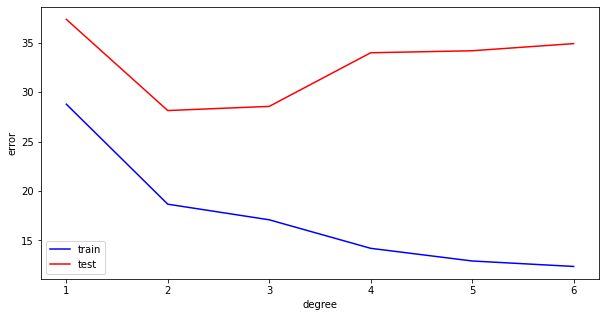

In [20]:
plt.figure(figsize=(10,5))
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [21]:
# 1. Instancie y entrene una regresión polinomial.
pf_3 = PolynomialFeatures(2)
lr_3 = LinearRegression(fit_intercept=False)
model = make_pipeline(pf_3, lr_3)
model.fit(X_train_fs, y_train_fs)

#2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
y_train_pred_3 = model.predict(X_train_fs)
y_val_pred_3 = model.predict(X_test_fs)

#3.Guarde los errores en una lista.
train_error_3 = mean_squared_error(y_train_fs, y_train_pred_3)
test_error_3 = mean_squared_error(y_test_fs, y_val_pred_3)
print(f"Polinomio grado {2}\n- Train Error: {train_error_3:0.3}\n- Test_error: {test_error_3:0.3}")

Polinomio grado 2
- Train Error: 18.7
- Test_error: 28.1


### Tres Atributos
Se consideran nuevamente 'RM', 'LSTAT' y ahora 'PTRATIO' que demostraro ser las 3 variables mas informativas.

In [22]:
# 1. Resolver acá. Ayuda (con 3 atributos):
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'PTRATIO')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
y_final = y_train.reshape(-1,1)
y_train_fs = np.concatenate((y_final, y_final, y_final), axis=1)

print(f"X_train: {X_train_fs.shape} , {X_test_fs.shape},{y_train_fs.shape}")

X_train: (404, 3) , (102, 3),(404, 3)


In [23]:

train_errors = []
test_errors = []
degrees = [1,2,3,4,5,6]  # -- IMPORTANTE -- Problema de Shape por polinomio de grado 0
y_test_fs= y_test.reshape(-1,1)
y_test_fs = np.concatenate((y_test_fs, y_test_fs, y_test_fs), axis=1)
for degree in degrees:
  # 1. Instancie y entrene una regresión polinomial.
  pf = PolynomialFeatures(degree)
  lr = LinearRegression(fit_intercept=True)
  model_2 = make_pipeline(pf, lr)
  model_2.fit(X_train_fs, y_train_fs)

  #2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
 
  y_train_pred_fs = model_2.predict(X_train_fs)
  y_val_pred_fs = model_2.predict(X_test_fs)

  #3.Guarde los errores en una lista.
  train_error = mean_squared_error(y_train_fs, y_train_pred_fs)
  test_error = mean_squared_error(y_test_fs, y_val_pred_fs)
  train_errors.append(train_error)
  test_errors.append(test_error)
  print(f"Polinomio grado {degree}\n- Train Error: {train_error:0.3}\n- Test_error: {test_error:0.3}")

Polinomio grado 1
- Train Error: 23.7
- Test_error: 41.7
Polinomio grado 2
- Train Error: 14.2
- Test_error: 30.0
Polinomio grado 3
- Train Error: 12.5
- Test_error: 31.0
Polinomio grado 4
- Train Error: 9.51
- Test_error: 37.9
Polinomio grado 5
- Train Error: 8.2
- Test_error: 32.2
Polinomio grado 6
- Train Error: 7.21
- Test_error: 79.7


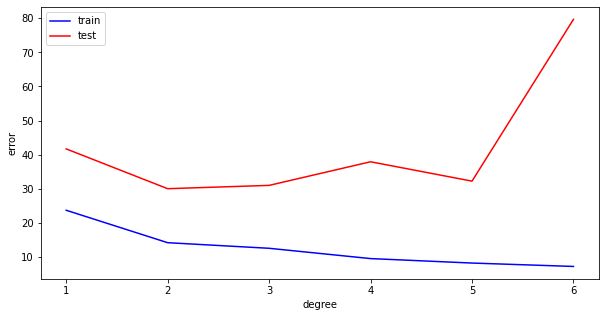

In [24]:
plt.figure(figsize=(10,5))
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [25]:
# 1. Instancie y entrene una regresión polinomial.
pf_4 = PolynomialFeatures(2)
lr_4 = LinearRegression(fit_intercept=False)
model = make_pipeline(pf_4, lr_4)
model.fit(X_train_fs, y_train_fs)

#train_error = mean_squared_error(y_train_fs, y_train_pred_fs)
#test_error = mean_squared_error(y_test_fs, y_val_pred_fs)

#2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
y_train_pred_4 = model.predict(X_train_fs)
y_val_pred_4 = model.predict(X_test_fs)

#3.Guarde los errores en una lista.
train_error_4 = mean_squared_error(y_train_fs, y_train_pred_4)
test_error_4 = mean_squared_error(y_test_fs, y_val_pred_4)
print(f"Polinomio grado {2}\n- Train Error: {train_error_4:0.3}\n- Test_error: {test_error_4:0.3}")

Polinomio grado 2
- Train Error: 14.2
- Test_error: 30.0


## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [26]:
#Ver de hacerlo iterable, onda horrible asi
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'PTRATIO') | \
           (boston['feature_names'] == 'INDUS') | (boston['feature_names'] == 'TAX') | (boston['feature_names'] == 'NOX') | \
           (boston['feature_names'] == 'CHAS') | (boston['feature_names'] == 'AGE') | (boston['feature_names'] == 'DIS') | \
           (boston['feature_names'] == 'CRIM ') | (boston['feature_names'] == 'ZN') | (boston['feature_names'] == 'RAD') | (boston['feature_names'] == 'B')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
y_final = y_train.reshape(-1,1)
#Tambien ver de hacerlo iterable
y_train_fs = np.concatenate((y_final, y_final, y_final, y_final, y_final, y_final, y_final,\
                             y_final, y_final, y_final, y_final, y_final), axis=1)

print(f"X_train: {X_train_fs.shape} , {X_test_fs.shape},{y_train_fs.shape}")

X_train: (404, 12) , (102, 12),(404, 12)


In [27]:
train_errors = []
test_errors = []
degrees = [1,2,3,4,5,6,7,8,9,10]  # -- IMPORTANTE -- Problema de Shape por polinomio de grado 0
y_test_fs= y_test.reshape(-1,1)
y_test_fs = np.concatenate((y_test_fs, y_test_fs, y_test_fs, y_test_fs, y_test_fs, y_test_fs, y_test_fs,\
                             y_test_fs, y_test_fs, y_test_fs, y_test_fs, y_test_fs), axis=1)
for degree in degrees:
  # 1. Instancie y entrene una regresión polinomial.
  pf = PolynomialFeatures(degree)
  lr = LinearRegression(fit_intercept=True)
  model_2 = make_pipeline(pf, lr)
  model_2.fit(X_train_fs, y_train_fs)

  #2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
  
  #Aca tambien ver de hacerlo iterable
 
  y_train_pred_fs = model_2.predict(X_train_fs)
  y_val_pred_fs = model_2.predict(X_test_fs)

  #3.Guarde los errores en una lista.
  train_error = mean_squared_error(y_train_fs, y_train_pred_fs) #Hay que usa MSE o RMSE?
  test_error = mean_squared_error(y_test_fs, y_val_pred_fs)
  train_errors.append(train_error)
  test_errors.append(test_error)
  print(f"Polinomio grado {degree}\n- Train Error: {train_error:0.3}\n- Test_error: {test_error:0.3}")

Polinomio grado 1
- Train Error: 19.9
- Test_error: 33.7
Polinomio grado 2
- Train Error: 7.06
- Test_error: 43.2
Polinomio grado 3
- Train Error: 0.16
- Test_error: 1.07e+11
Polinomio grado 4
- Train Error: 2.21e-09
- Test_error: 4.33e+06
Polinomio grado 5
- Train Error: 5.34e-18
- Test_error: 1.13e+07
Polinomio grado 6
- Train Error: 2.8e-18
- Test_error: 5.92e+05
Polinomio grado 7
- Train Error: 1.19e-18
- Test_error: 2.53e+05
Polinomio grado 8
- Train Error: 2.26e-18
- Test_error: 3.28e+05
Polinomio grado 9
- Train Error: 9.55e-18
- Test_error: 7.98e+05
Polinomio grado 10
- Train Error: 1.42e-17
- Test_error: 2.16e+05


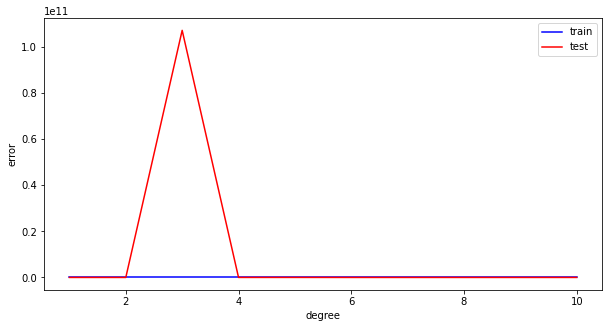

In [28]:
plt.figure(figsize=(10,5))
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()



### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [29]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM') 
X_train_fd = X_train[:, selector]
X_test_fd = X_test[:, selector]
y_final = y_train.reshape(-1,1)
y_train_fd = np.concatenate((y_final, y_final), axis=1)

print(f" {X_train_fd.shape} , {X_test_fd.shape},{y_train_fd.shape}")

 (404, 2) , (102, 2),(404, 2)


In [30]:
# 1. Instancie y entrene una regresión polinomial.
from sklearn.linear_model import Ridge
pfs = PolynomialFeatures(7)
model = make_pipeline(pfs, Ridge(alpha=1000000000))
model.fit(X_train_fd, y_train_fd)

#train_error = mean_squared_error(y_train_fd, y_train_pred_fs)
#test_error = mean_squared_error(y_test_fs, y_val_pred_fs)

#2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
y_test_fd = y_test.reshape(-1,1)
y_test_fd = np.concatenate((y_test_fd, y_test_fd), axis=1)
y_train_pred_d = model.predict(X_train_fd)
y_val_pred_d = model.predict(X_test_fd)

#3.Guarde los errores en una lista.
train_error_d = mean_squared_error(y_train_fd, y_train_pred_d)
test_error_d = mean_squared_error(y_test_fd, y_val_pred_d)
print(f"Polinomio grado {5}\n- Train Error: {train_error_d:0.3}\n- Test_error: {test_error_d:0.3}")

Polinomio grado 5
- Train Error: 17.1
- Test_error: 28.6


In [31]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM') 
X_train_fd = X_train[:, selector]
X_test_fd = X_test[:, selector]
y_final = y_train.reshape(-1,1)
y_train_fd = np.concatenate((y_final, y_final), axis=1)

print(f" {X_train_fd.shape} , {X_test_fd.shape},{y_train_fd.shape}")

 (404, 2) , (102, 2),(404, 2)


In [32]:
# 1. Instancie y entrene una regresión polinomial.
from sklearn.linear_model import Ridge
pfs = PolynomialFeatures(5)
model = make_pipeline(pfs, Ridge(alpha=1000))
model.fit(X_train_fd, y_train_fd)

#train_error = mean_squared_error(y_train_fd, y_train_pred_fs)
#test_error = mean_squared_error(y_test_fs, y_val_pred_fs)

#2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
y_test_fd = y_test.reshape(-1,1)
y_test_fd = np.concatenate((y_test_fd, y_test_fd), axis=1)
y_train_pred_d = model.predict(X_train_fd)
y_val_pred_d = model.predict(X_test_fd)

#3.Guarde los errores en una lista.
train_error_d = mean_squared_error(y_train_fd, y_train_pred_d)
test_error_d = mean_squared_error(y_test_fd, y_val_pred_d)
print(f"Polinomio grado {5}\n- Train Error: {train_error_d:0.3}\n- Test_error: {test_error_d:0.3}")

Polinomio grado 5
- Train Error: 16.1
- Test_error: 28.4


Probar Ridge con todos los features